 ## Another strategy for project 1

In [1]:
import numpy as np
import pandas as pd
import pyfolio as pf
import matplotlib.pyplot as plt
import yfinance as yf
from pandas import Series, DataFrame

TSMC_price_data = yf.download('2330.TW', start = '2018-01-01', end = '2022-07-18')
TSMC_price_data['Date'] = TSMC_price_data.index
print(TSMC_price_data)
TSMC_price_data['Date'] = pd.to_datetime(TSMC_price_data['Date'], format = '%Y-%m-%d')

/Users/abnerteng/opt/miniconda3/lib/python3.8/site-packages/pyfolio/pos.py:26: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  warnings.warn(


[*********************100%***********************]  1 of 1 completed
             Open   High    Low  Close   Adj Close    Volume       Date
Date                                                                   
2018-01-02  231.5  232.5  231.0  232.5  202.319672  18055269 2018-01-02
2018-01-03  236.0  238.0  235.5  237.0  206.235535  29308091 2018-01-03
2018-01-04  240.0  240.0  236.5  239.5  208.411011  29096613 2018-01-04
2018-01-05  240.0  240.0  238.0  240.0  208.846115  22438255 2018-01-05
2018-01-08  242.0  242.5  240.5  242.0  210.586472  20233692 2018-01-08
...           ...    ...    ...    ...         ...       ...        ...
2022-07-11  468.0  470.5  461.0  462.0  462.000000  21941710 2022-07-11
2022-07-12  458.0  458.0  449.5  449.5  449.500000  23036423 2022-07-12
2022-07-13  470.5  473.0  466.0  470.5  470.500000  44035695 2022-07-13
2022-07-14  466.0  477.5  463.0  475.0  475.000000  31936258 2022-07-14
2022-07-15  481.0  494.0  477.0  492.5  492.500000  51846909 2022-0

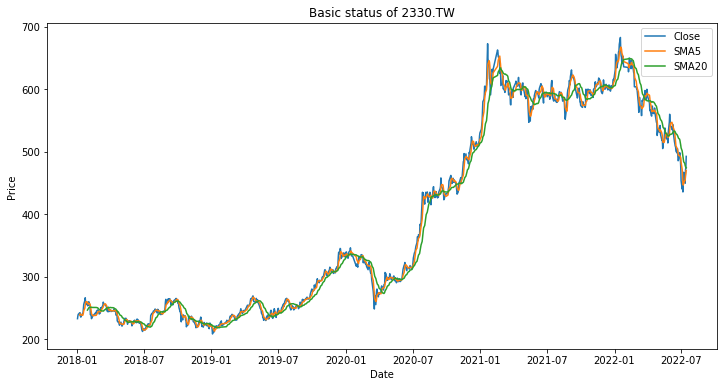

In [2]:
TSMC_price_data['Close'] = pd.to_numeric(TSMC_price_data['Close'])
TSMC_price_data['SMA5'] = TSMC_price_data['Close'].rolling(5).mean()
TSMC_price_data['SMA20'] = TSMC_price_data['Close'].rolling(20).mean()

plt.figure(figsize = (12, 6))
plt.plot(TSMC_price_data['Close'])
plt.plot(TSMC_price_data['SMA5'])
plt.plot(TSMC_price_data['SMA20'])
plt.legend(['Close', 'SMA5', 'SMA20'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Basic status of 2330.TW')
plt.show()

In [4]:
SMA_difference = TSMC_price_data['SMA5'] - TSMC_price_data['SMA20']
stock = 0
signal = []
for i in range(len(TSMC_price_data)):
    if SMA_difference[i-1] < 0 and SMA_difference[i] > 0 and stock == 0:
        signal.append(1)
        stock += 1 
    elif SMA_difference[i-1] > 0 and SMA_difference[i] < 0 and stock == 1:
        signal.append(-1)
        stock -= 1
    else:
        signal.append(0)

TSMC_price_data['SMA_signal'] = pd.DataFrame(data = signal, index = TSMC_price_data.index)

In [7]:
Returns = []
stock = 0
stock_stat = []
buy_price = 0
sell_price = 0

for i in range(len(TSMC_price_data)-1):
    stock_stat.append(stock)
    if TSMC_price_data['SMA_signal'][i] == 1:
        buy_price = TSMC_price_data['Open'][i+1]
        stock += 1
    elif TSMC_price_data['SMA_signal'][i] == -1:
        sell_price = TSMC_price_data['Open'][i+1]
        stock -= 1
        Returns.append((sell_price - buy_price) / buy_price)
        buy_price = 0
        sell_price = 0

In [8]:
benchmark_return = TSMC_price_data['Close'].pct_change()